# Importing Libraries

In [15]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jingf\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8


Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

# Test set Image Processing

In [17]:
test_set = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3825 files belonging to 3 classes.


# Loading Model

In [18]:
cnn = tf.keras.models.load_model('trained_model.h5')

#Visualising and Performing Prediction on Single image

Dataset path: C:\Users\jingf\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8
Contents of dataset directory:
  test
  train
  validation

Contents of test:
    apple
    banana
    beetroot
    bell pepper
    cabbage
    capsicum
    carrot
    cauliflower
    chilli pepper
    corn
    ... and 26 more items

Contents of train:
    apple
    banana
    beetroot
    bell pepper
    cabbage
    capsicum
    carrot
    cauliflower
    chilli pepper
    corn
    ... and 26 more items

Contents of validation:
    apple
    banana
    beetroot
    bell pepper
    cabbage
    capsicum
    carrot
    cauliflower
    chilli pepper
    corn
    ... and 26 more items
Files in apple test folder:
  Image_1.jpg
  Image_10.jpg
  Image_2.jpg
  Image_3.jpg
  Image_4.jpg

Using image: Image_1.jpg
Full path: C:\Users\jingf\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\test\apple\Image_1.jpg


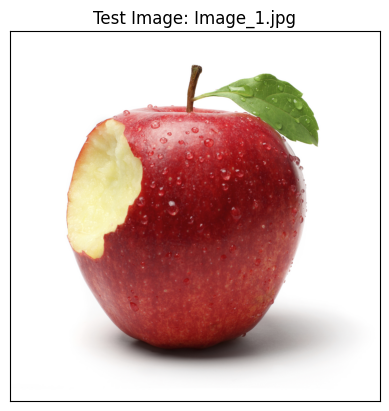

In [ ]:
# Test Image Visualization
import cv2
import os

# Get the first available image from the apple test folder
apple_test_path = os.path.join(path, 'test', 'apple')
apple_files = os.listdir(apple_test_path)

if apple_files:
    image_filename = apple_files[0]  # Use the first image
    image_path = os.path.join(path, 'test', 'apple', image_filename)
    
    # Reading an image in default mode
    img = cv2.imread(image_path)
    
    if img is not None:  # Check if image was loaded successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
        # Displaying the image 
        plt.imshow(img)
        plt.title(f'Test Image: {image_filename}')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        print(f"Successfully loaded: {image_filename}")
    else:
        print("Error: Could not load image")
else:
    print("Error: No files found in apple test folder")

#Testing Model

In [23]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 151ms/step


In [24]:
print(predictions)

[[0.31132713 0.32710588 0.361567  ]]


In [87]:
# test_set.class_names

In [25]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


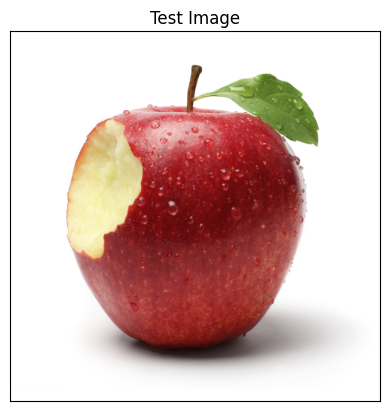

In [27]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a validation
